# 1. Library

In [ ]:
import tensorflow as tf 

import os
from glob import glob
import numpy as np 
import pandas as pd

from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install matplotlib==3.4

# 2. Mount the Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# 3. Read the dataset

In [ ]:
filepath_metrics = Path('/content/drive/My Drive/MasterProject/metrics.xlsx')
df_metrics = pd.read_csv(filepath_metrics)

In [ ]:
df_metrics

,Name of a Model,"Training Accuracy, %","Top 5 Training accuracy, %","Validation accuracy, %","Top 5 Validation accuracy, %",Training loss,Validation loss
0,DenseNet201 model for Dahlia,21.44,56.93,51.18,84.71,2.84,1.93
1,Xception model for Dahlia,28.75,66.41,52.94,87.06,2.49,1.75
2,InceptionResNetV2 model for Dahlia,15.94,50.09,31.76,70.59,3.01,2.46
3,EfficientNetB7 model for Dahlia,2.56,11.01,2.94,10.59,4.16,4.07
4,DenseNet201 model for Helleborus,84.50,100.00,95.00,100.00,0.50,0.29
5,Xception model for Helleborus,84.50,100.00,100.00,100.00,0.55,0.19
6,InceptionResNetV2 model for Helleborus,65.12,100.00,85.00,100.00,0.90,0.44
7,EfficientNetB7 model for Helleborus,20.16,79.84,15.00,75.00,2.26,1.97
8,DenseNet201 model for cultivar,24.60,60.19,49.47,90.00,2.76,1.89
9,Xception model for cultivar,24.68,61.71,49.47,84.74,2.69,1.80


In [ ]:
df_ = df_metrics[df_metrics["Training Accuracy, %	"] != 2.37]
df_

In [ ]:
dahlia_metrics = df_metrics.loc[df_metrics["Name of a Model"].str.contains("Dahlia")]  
dahlia_metrics

,Name of a Model,"Training Accuracy, %","Top 5 Training accuracy, %","Validation accuracy, %","Top 5 Validation accuracy, %",Training loss,Validation loss
0,DenseNet201 model for Dahlia,21.44,56.93,51.18,84.71,2.84,1.93
1,Xception model for Dahlia,28.75,66.41,52.94,87.06,2.49,1.75
2,InceptionResNetV2 model for Dahlia,15.94,50.09,31.76,70.59,3.01,2.46
3,EfficientNetB7 model for Dahlia,2.56,11.01,2.94,10.59,4.16,4.07


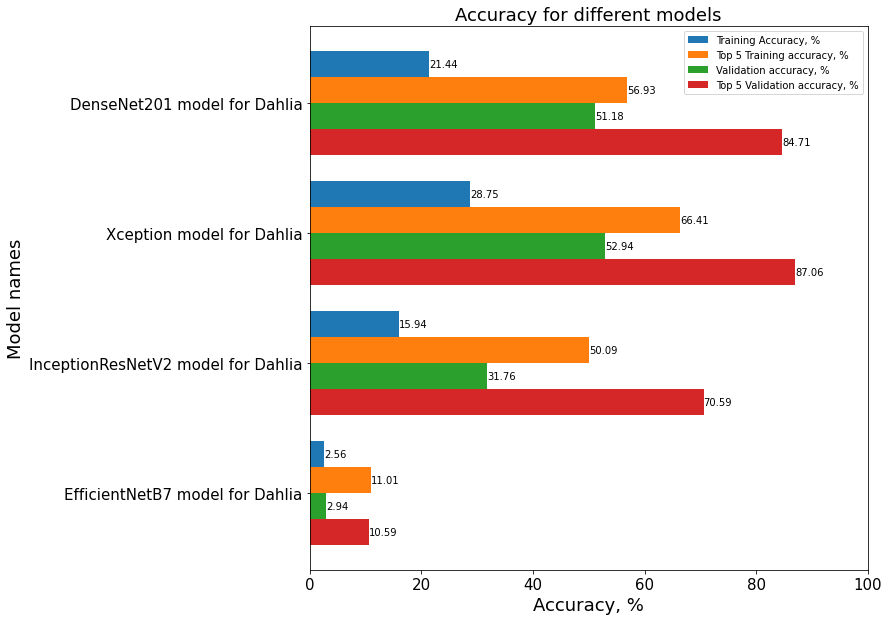

In [ ]:
width = 0.2

x = dahlia_metrics['Name of a Model']
y=["Training Accuracy, %", "Top 5 Training accuracy, %", "Validation accuracy, %", "Top 5 Validation accuracy, %"]

y1 = dahlia_metrics["Training Accuracy, %"]
y2 = dahlia_metrics["Top 5 Training accuracy, %"]
y3 = dahlia_metrics["Validation accuracy, %"]
y4 = dahlia_metrics["Top 5 Validation accuracy, %"]

fig, ax = plt.subplots(figsize=(10, 10))
r = np.arange(4)
rects1 = ax.barh(r - 1.5*width, y1, width)
rects2 = ax.barh(r - 0.5*width, y2, width)
rects3 = ax.barh(r + 0.5*width, y3, width)
rects4 = ax.barh(r + 1.5*width, y4, width)

ax.invert_yaxis()

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Accuracy for different models', size=18)
plt.xlabel('Accuracy, %', size=18)
plt.ylabel('Model names', size=18)
ax.tick_params(axis='both', labelsize=15)
ax.set_yticks(r)
ax.set_yticklabels(x)
ax.legend((rects1[0],rects2[0],rects3[0],rects4[0]), (y))
plt.xlim([0, 100])
plt.show()

In [ ]:
helleborus_metrics = df_metrics.loc[df_metrics["Name of a Model"].str.contains("Helleborus")]  
helleborus_metrics

,Name of a Model,"Training Accuracy, %","Top 5 Training accuracy, %","Validation accuracy, %","Top 5 Validation accuracy, %",Training loss,Validation loss
4,DenseNet201 model for Helleborus,84.50,100.00,95.0,100.0,0.50,0.29
5,Xception model for Helleborus,84.50,100.00,100.0,100.0,0.55,0.19
6,InceptionResNetV2 model for Helleborus,65.12,100.00,85.0,100.0,0.90,0.44
7,EfficientNetB7 model for Helleborus,20.16,79.84,15.0,75.0,2.26,1.97


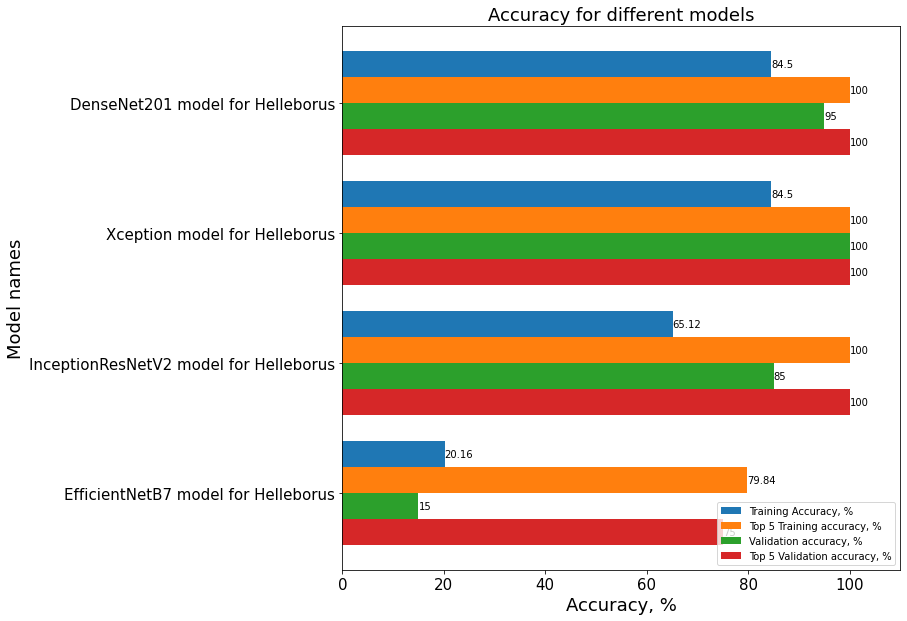

In [ ]:
width = 0.2

x = helleborus_metrics['Name of a Model']
y=["Training Accuracy, %", "Top 5 Training accuracy, %", "Validation accuracy, %", "Top 5 Validation accuracy, %"]

y1 = helleborus_metrics["Training Accuracy, %"]
y2 = helleborus_metrics["Top 5 Training accuracy, %"]
y3 = helleborus_metrics["Validation accuracy, %"]
y4 = helleborus_metrics["Top 5 Validation accuracy, %"]

fig, ax = plt.subplots(figsize=(10, 10))
r = np.arange(4)
rects1 = ax.barh(r - 1.5*width, y1, width)
rects2 = ax.barh(r - 0.5*width, y2, width)
rects3 = ax.barh(r + 0.5*width, y3, width)
rects4 = ax.barh(r + 1.5*width, y4, width)

ax.invert_yaxis()

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Accuracy for different models', size=18)
plt.xlabel('Accuracy, %', size=18)
plt.ylabel('Model names', size=18)
ax.tick_params(axis='both', labelsize=15)
ax.set_yticks(r)
ax.set_yticklabels(x)
ax.legend((rects1[0],rects2[0],rects3[0],rects4[0]), (y))
plt.xlim([0, 110])
plt.show()

In [ ]:
cultivar_metrics = df_metrics.loc[df_metrics["Name of a Model"].str.contains("cultivar")]  
cultivar_metrics

,Name of a Model,"Training Accuracy, %","Top 5 Training accuracy, %","Validation accuracy, %","Top 5 Validation accuracy, %",Training loss,Validation loss
8,DenseNet201 model for cultivar,24.60,60.19,49.47,90.00,2.76,1.89
9,Xception model for cultivar,24.68,61.71,49.47,84.74,2.69,1.80
10,InceptionResNetV2 model for cultivar,18.68,52.49,37.37,68.95,2.99,2.40
11,EfficientNetB7 model for cultivar,1.86,8.88,2.63,10.00,4.26,4.18


In [ ]:
genus_metrics = df_metrics.loc[df_metrics["Name of a Model"].str.contains("genus")]  
genus_metrics

,Name of a Model,"Training Accuracy, %","Top 5 Training accuracy, %","Validation accuracy, %","Top 5 Validation accuracy, %",Training loss,Validation loss
12,DenseNet201 model for genus,98.82,100.0,100.00,100.0,0.03,0.00
13,Xception model for genus,98.90,100.0,100.00,100.0,0.04,0.00
14,InceptionResNetV2 model for genus,97.72,100.0,100.00,100.0,0.06,0.01
15,EfficientNetB7 model for genus,89.10,100.0,89.47,100.0,0.35,0.34


In [ ]:
model_dict = {"Dahlia":dahlia_metrics,"Helleborus":helleborus_metrics,"Cultivar":cultivar_metrics,"Genus":genus_metrics}

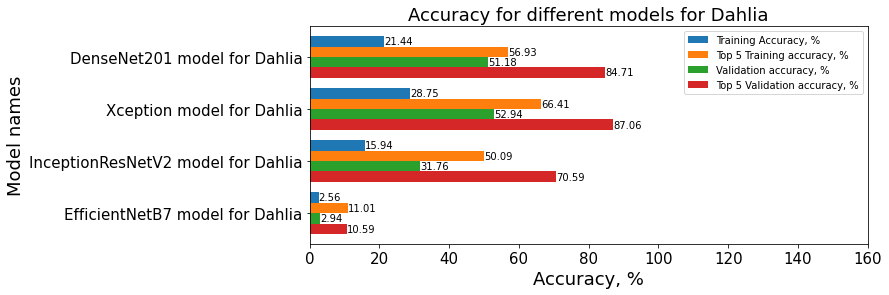

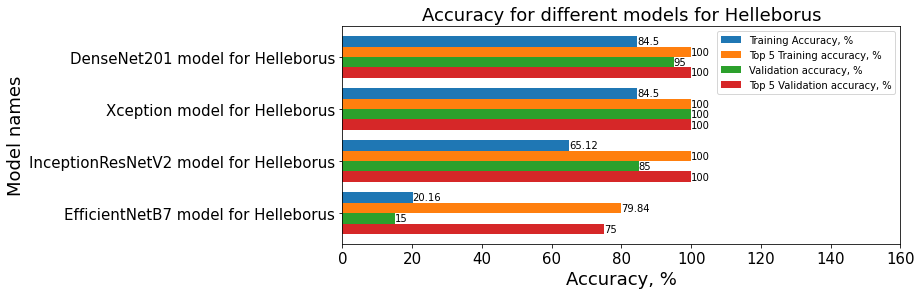

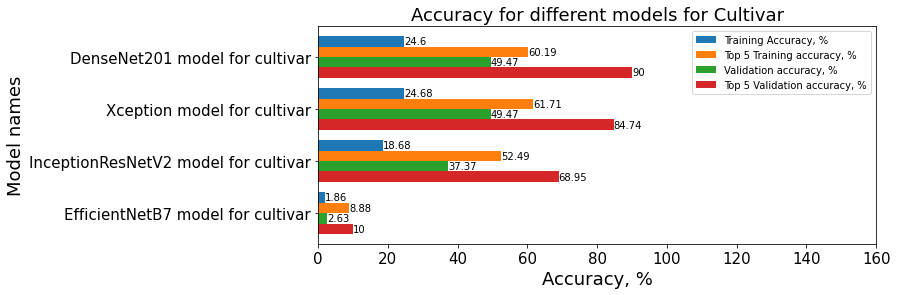

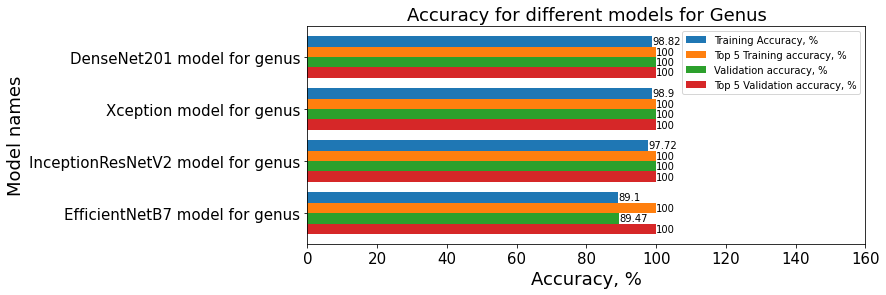

In [ ]:
for key,value in model_dict.items():
  width = 0.2

  x = value['Name of a Model']
  
  y = ["Training Accuracy, %", "Top 5 Training accuracy, %", "Validation accuracy, %", "Top 5 Validation accuracy, %"]

  y1 = value["Training Accuracy, %"]
  y2 = value["Top 5 Training accuracy, %"]
  y3 = value["Validation accuracy, %"]
  y4 = value["Top 5 Validation accuracy, %"]

  fig, ax = plt.subplots(figsize=(10, 4))
  r = np.arange(len(y))
  
  rects1 = ax.barh(r - 1.5*width, y1, width)
  rects2 = ax.barh(r - 0.5*width, y2, width)
  rects3 = ax.barh(r + 0.5*width, y3, width)
  rects4 = ax.barh(r + 1.5*width, y4, width)
  
  ax.invert_yaxis()

  for bars in ax.containers:
      ax.bar_label(bars)

  ax.set_title('Accuracy for different models for '+ key, size=18)
  ax.set_xlabel('Accuracy, %', size=18)
  ax.set_ylabel('Model names', size=18)
  ax.tick_params(axis='both', labelsize=15)
  ax.set_yticks(r)
  ax.set_yticklabels(x)
  ax.legend((rects1[0],rects2[0],rects3[0],rects4[0]), (y))
  plt.xlim([0, 160])
  plt.show()

In [ ]:
DenseNet201_metrics = df_metrics.loc[df_metrics["Name of a Model"].str.contains("DenseNet201")]  
DenseNet201_metrics

,Name of a Model,"Training Accuracy, %","Top 5 Training accuracy, %","Validation accuracy, %","Top 5 Validation accuracy, %",Training loss,Validation loss
0,DenseNet201 model for Dahlia,21.44,56.93,51.18,84.71,2.84,1.93
4,DenseNet201 model for Helleborus,84.50,100.00,95.00,100.00,0.50,0.29
8,DenseNet201 model for cultivar,24.60,60.19,49.47,90.00,2.76,1.89
12,DenseNet201 model for genus,98.82,100.00,100.00,100.00,0.03,0.00


In [ ]:
Xception_metrics = df_metrics.loc[df_metrics["Name of a Model"].str.contains("Xception")]  
Xception_metrics

,Name of a Model,"Training Accuracy, %","Top 5 Training accuracy, %","Validation accuracy, %","Top 5 Validation accuracy, %",Training loss,Validation loss
1,Xception model for Dahlia,28.75,66.41,52.94,87.06,2.49,1.75
5,Xception model for Helleborus,84.50,100.00,100.00,100.00,0.55,0.19
9,Xception model for cultivar,24.68,61.71,49.47,84.74,2.69,1.80
13,Xception model for genus,98.90,100.00,100.00,100.00,0.04,0.00


In [ ]:
InceptionResNetV2_metrics = df_metrics.loc[df_metrics["Name of a Model"].str.contains("InceptionResNetV2")]  
InceptionResNetV2_metrics

,Name of a Model,"Training Accuracy, %","Top 5 Training accuracy, %","Validation accuracy, %","Top 5 Validation accuracy, %",Training loss,Validation loss
2,InceptionResNetV2 model for Dahlia,15.94,50.09,31.76,70.59,3.01,2.46
6,InceptionResNetV2 model for Helleborus,65.12,100.00,85.00,100.00,0.90,0.44
10,InceptionResNetV2 model for cultivar,18.68,52.49,37.37,68.95,2.99,2.40
14,InceptionResNetV2 model for genus,97.72,100.00,100.00,100.00,0.06,0.01


In [ ]:
EfficientNetB7_metrics = df_metrics.loc[df_metrics["Name of a Model"].str.contains("EfficientNetB7")]  
EfficientNetB7_metrics

,Name of a Model,"Training Accuracy, %","Top 5 Training accuracy, %","Validation accuracy, %","Top 5 Validation accuracy, %",Training loss,Validation loss
3,EfficientNetB7 model for Dahlia,2.56,11.01,2.94,10.59,4.16,4.07
7,EfficientNetB7 model for Helleborus,20.16,79.84,15.00,75.00,2.26,1.97
11,EfficientNetB7 model for cultivar,1.86,8.88,2.63,10.00,4.26,4.18
15,EfficientNetB7 model for genus,89.10,100.00,89.47,100.00,0.35,0.34


In [ ]:
algorithm_dict = {"DenseNet201":DenseNet201_metrics,"Xception":Xception_metrics,"InceptionResNetV2":InceptionResNetV2_metrics,"EfficientNetB7":EfficientNetB7_metrics}

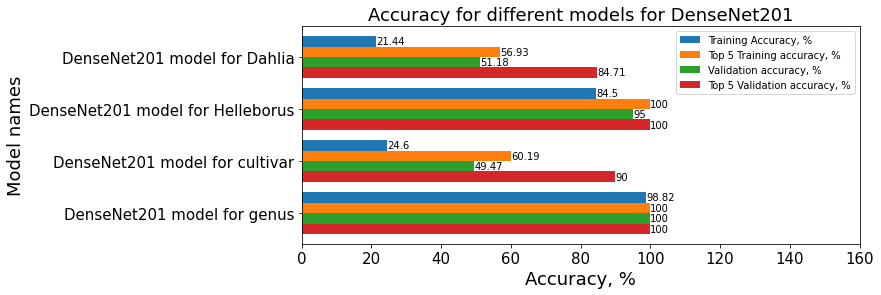

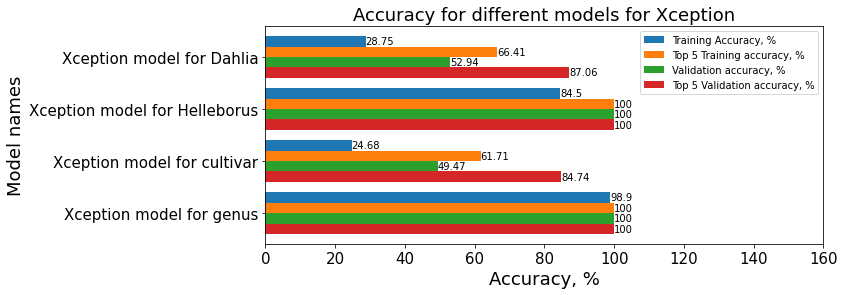

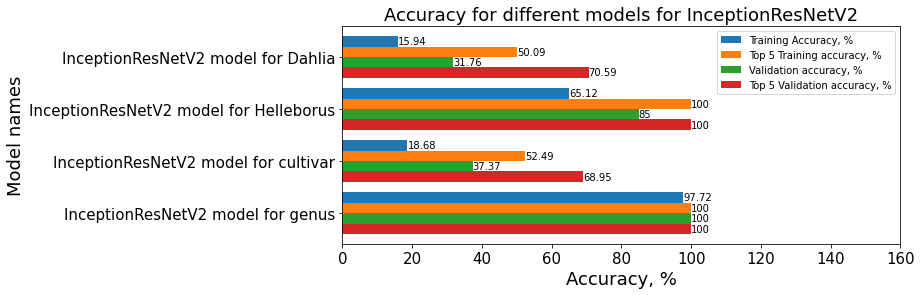

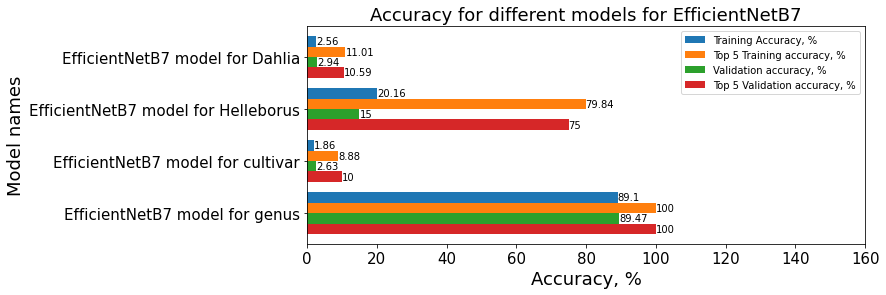

In [ ]:
for key,value in algorithm_dict.items():
  width = 0.2

  x = value['Name of a Model']
  
  y = ["Training Accuracy, %", "Top 5 Training accuracy, %", "Validation accuracy, %", "Top 5 Validation accuracy, %"]

  y1 = value["Training Accuracy, %"]
  y2 = value["Top 5 Training accuracy, %"]
  y3 = value["Validation accuracy, %"]
  y4 = value["Top 5 Validation accuracy, %"]

  fig, ax = plt.subplots(figsize=(10, 4))
  r = np.arange(len(y))
  
  rects1 = ax.barh(r - 1.5*width, y1, width)
  rects2 = ax.barh(r - 0.5*width, y2, width)
  rects3 = ax.barh(r + 0.5*width, y3, width)
  rects4 = ax.barh(r + 1.5*width, y4, width)
  
  ax.invert_yaxis()

  for bars in ax.containers:
      ax.bar_label(bars)

  ax.set_title('Accuracy for different models for '+ key, size=18)
  ax.set_xlabel('Accuracy, %', size=18)
  ax.set_ylabel('Model names', size=18)
  ax.tick_params(axis='both', labelsize=15)
  ax.set_yticks(r)
  ax.set_yticklabels(x)
  ax.legend((rects1[0],rects2[0],rects3[0],rects4[0]), (y))
  plt.xlim([0, 160])
  plt.show()

In [ ]:
filepath_result = Path('/content/drive/My Drive/MasterProject/result.xlsx')
df_result = pd.read_csv(filepath_result)

In [ ]:
df_result

,Model,True Name,Name of a Plant,%
0,DenseNet201 model for Dahlia,Dahlia _Alauna Clair-obscur_,Dahlia _Alauna Clair-obscur_,75.11
1,DenseNet201 model for Dahlia,Dahlia _Alauna Clair-obscur_,Dahlia _Destiny_s Teachers_,15.17
2,DenseNet201 model for Dahlia,Dahlia _Alauna Clair-obscur_,Dahlia _Melody Harmony_,7.54
3,DenseNet201 model for Dahlia,Dahlia _Alauna Clair-obscur_,Dahlia _My Love_,1.62
4,DenseNet201 model for Dahlia,Dahlia _Alauna Clair-obscur_,"Dahlia _Honka Dark_ (Honka Black, Dahlia _Verr...",0.43
...,...,...,...,...
86,InceptionResNetV2 model for genus,Dahlia _Alauna Clair-obscur_,Helleborus,0.01
87,EfficientNetB7 model for genus,Helleborus _Penny_s Pink_,Dahlia,89.32
88,EfficientNetB7 model for genus,Helleborus _Penny_s Pink_,Helleborus,10.68
89,EfficientNetB7 model for genus,Dahlia _Alauna Clair-obscur_,Dahlia,89.31


In [ ]:
frequency = df_result['Name of a Plant'].value_counts()
frequency

Helleborus _Molly_s White_                                        4
Helleborus niger (Christmas Rose)                                 4
Dahlia _Alauna Clair-obscur_                                      3
Dahlia _Melody Harmony_                                           3
Dahlia _My Love_                                                  3
Dahlia _Honka Dark_ (Honka Black, Dahlia _Verrone’s Obsidian_)    3
Helleborus _Walhelivor (Ivory Prince)_                            3
Helleborus _Penny_s Pink_                                         3
Helleborus _Frostkiss Glenda_s Gloss_                             3
Dahlia _Bishop of York_                                           2
Dahlia _Destiny_s Teachers_                                       2
Helleborus _Yellow Lady_                                          2
Dahlia _Arabian Night_                                            1
Dahlia _Chat Noir_                                                1
Dahlia _Bishop of Dover_                        

In [ ]:
df_result.groupby(['Name of a Plant']).sum().sort_values("%", ascending=False)

,%
Name of a Plant,
Helleborus _Molly_s White_,114.65
Dahlia _Alauna Clair-obscur_,100.00
Helleborus niger (Christmas Rose),94.55
Dahlia _Melody Harmony_,60.69
Helleborus _Yellow Lady_,52.69
"Dahlia _Honka Dark_ (Honka Black, Dahlia _Verrone’s Obsidian_)",43.75
Dahlia _My Love_,42.12
Helleborus _Penny_s Pink_,41.89
Helleborus _Frostkiss Glenda_s Gloss_,29.31


In [ ]:
cultivar_df = df_result.groupby(['Model','True Name','Name of a Plant']).sum().sort_values("Model", ascending=False)
cultivar_df

%
Model                        True Name                    Name of a Plant                                           
Xception model for genus     Helleborus _Penny_s Pink_    Helleborus                                           99.46
                                                          Dahlia                                                0.54
                             Dahlia _Alauna Clair-obscur_ Helleborus                                            0.00
                                                          Dahlia                                              100.00
Xception model for cultivar  Helleborus _Penny_s Pink_    Helleborus niger (Christmas Rose)                    17.99
...                                                                                                              ...
DenseNet201 model for Dahlia Dahlia _Alauna Clair-obscur_ Dahlia _Melody Harmony_                               7.54
                                                          Dahlia _Honka Dark_ (Honka Black, Dahlia _Verro...    0.43
                                                          Dahlia _Destiny_s Teachers_                          15.17
                                                          Dahlia _My Love_                                      1.62
                                                          Dahlia _Alauna Clair-obscur_                         75.11

[91 rows x 1 columns]

In [ ]:
dahlia = df_result.loc[df_result["Model"].str.contains("Dahlia")]  
dahlia

,Model,True Name,Name of a Plant,%
0,DenseNet201 model for Dahlia,Dahlia _Alauna Clair-obscur_,Dahlia _Alauna Clair-obscur_,75.11
1,DenseNet201 model for Dahlia,Dahlia _Alauna Clair-obscur_,Dahlia _Destiny_s Teachers_,15.17
2,DenseNet201 model for Dahlia,Dahlia _Alauna Clair-obscur_,Dahlia _Melody Harmony_,7.54
3,DenseNet201 model for Dahlia,Dahlia _Alauna Clair-obscur_,Dahlia _My Love_,1.62
4,DenseNet201 model for Dahlia,Dahlia _Alauna Clair-obscur_,"Dahlia _Honka Dark_ (Honka Black, Dahlia _Verr...",0.43
5,Xception model for Dahlia,Dahlia _Alauna Clair-obscur_,"Dahlia _Honka Dark_ (Honka Black, Dahlia _Verr...",34.49
6,Xception model for Dahlia,Dahlia _Alauna Clair-obscur_,Dahlia _Melody Harmony_,22.60
7,Xception model for Dahlia,Dahlia _Alauna Clair-obscur_,Dahlia _My Love_,18.04
8,Xception model for Dahlia,Dahlia _Alauna Clair-obscur_,Dahlia _Alauna Clair-obscur_,12.91
9,Xception model for Dahlia,Dahlia _Alauna Clair-obscur_,Dahlia _Destiny_s Teachers_,9.63


In [ ]:
dahlia.groupby(['Name of a Plant']).sum().sort_values("%", ascending=False)

,%
Name of a Plant,
Dahlia _Alauna Clair-obscur_,100.00
Dahlia _Melody Harmony_,60.69
"Dahlia _Honka Dark_ (Honka Black, Dahlia _Verrone’s Obsidian_)",43.75
Dahlia _My Love_,42.12
Dahlia _Destiny_s Teachers_,24.80
Dahlia _Bishop of York_,17.56
Dahlia _Tam Tam_,2.53
Dahlia _Bishop of Dover_,2.17
Dahlia _Arabian Night_,2.10


In [ ]:
helleborus = df_result.loc[df_result["Model"].str.contains("Helleborus")]   
helleborus

,Model,True Name,Name of a Plant,%
20,DenseNet201 model for Helleborus,Helleborus _Penny_s Pink_,Helleborus niger (Christmas Rose),38.66
21,DenseNet201 model for Helleborus,Helleborus _Penny_s Pink_,Helleborus _Yellow Lady_,30.69
22,DenseNet201 model for Helleborus,Helleborus _Penny_s Pink_,Helleborus _Molly_s White_,10.16
23,DenseNet201 model for Helleborus,Helleborus _Penny_s Pink_,Helleborus _Frostkiss Glenda_s Gloss_,9.55
24,DenseNet201 model for Helleborus,Helleborus _Penny_s Pink_,Helleborus _Penny_s Pink_,6.73
25,Xception model for Helleborus,Helleborus _Penny_s Pink_,Helleborus _Penny_s Pink_,30.21
26,Xception model for Helleborus,Helleborus _Penny_s Pink_,Helleborus niger (Christmas Rose),27.14
27,Xception model for Helleborus,Helleborus _Penny_s Pink_,Helleborus _Molly_s White_,26.11
28,Xception model for Helleborus,Helleborus _Penny_s Pink_,Helleborus _Frostkiss Glenda_s Gloss_,11.66
29,Xception model for Helleborus,Helleborus _Penny_s Pink_,Helleborus _Walhelivor (Ivory Prince)_,2.92


In [ ]:
helleborus.groupby(['Name of a Plant']).sum().sort_values("%", ascending=False)

,%
Name of a Plant,
Helleborus _Molly_s White_,114.65
Helleborus niger (Christmas Rose),94.55
Helleborus _Yellow Lady_,52.69
Helleborus _Penny_s Pink_,41.89
Helleborus _Frostkiss Glenda_s Gloss_,29.31
Helleborus _Walhelivor (Ivory Prince)_,25.51
Helleborus _Anna_s Red_,11.62


In [ ]:
cultivar = df_result.loc[df_result["Model"].str.contains("cultivar")]   
cultivar

,Model,True Name,Name of a Plant,%
40,DenseNet201 model for cultivar,Helleborus _Penny_s Pink_,Helleborus _Frostkiss Glenda_s Gloss_,23.46
41,DenseNet201 model for cultivar,Helleborus _Penny_s Pink_,Helleborus _Molly_s White_,17.60
42,DenseNet201 model for cultivar,Helleborus _Penny_s Pink_,Helleborus _Yellow Lady_,12.19
43,DenseNet201 model for cultivar,Helleborus _Penny_s Pink_,Helleborus _Walhelivor (Ivory Prince)_,10.99
44,DenseNet201 model for cultivar,Helleborus _Penny_s Pink_,Helleborus niger (Christmas Rose),8.38
45,DenseNet201 model for cultivar,Dahlia _Alauna Clair-obscur_,Dahlia _Alauna Clair-obscur_,42.13
46,DenseNet201 model for cultivar,Dahlia _Alauna Clair-obscur_,"Dahlia _Honka Dark_ (Honka Black, Dahlia _Verr...",28.04
47,DenseNet201 model for cultivar,Dahlia _Alauna Clair-obscur_,Dahlia _Destiny_s Teachers_,11.16
48,DenseNet201 model for cultivar,Dahlia _Alauna Clair-obscur_,Dahlia _Café au Lait_,3.57
49,DenseNet201 model for cultivar,Dahlia _Alauna Clair-obscur_,Dahlia _Melody Harmony_,3.17


In [ ]:
cultivar.groupby(['Name of a Plant']).sum().sort_values("%", ascending=False)

,%
Name of a Plant,
Dahlia _Melody Harmony_,72.88
Helleborus niger (Christmas Rose),48.63
Dahlia _Alauna Clair-obscur_,46.93
Helleborus _Frostkiss Glenda_s Gloss_,45.81
Helleborus _Molly_s White_,41.90
Helleborus _Walhelivor (Ivory Prince)_,32.36
Helleborus _Penny_s Pink_,31.01
"Dahlia _Honka Dark_ (Honka Black, Dahlia _Verrone’s Obsidian_)",28.04
Dahlia _Destiny_s Teachers_,23.79
